In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Read the CSV file into a dataframe
df_0 = pd.read_csv('../experiment/scenario0.csv', sep=",")
df_1 = pd.read_csv('../experiment/scenario1.csv', sep=",")
df_2 = pd.read_csv('../experiment/scenario2.csv', sep=",")
df_3 = pd.read_csv('../experiment/scenario3.csv', sep=",")
df_4 = pd.read_csv('../experiment/scenario4.csv', sep=",")

df_0

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
0,0,433698,263.190177,0,0.0,NaN,NaN,532.846447
1,0,588953,263.291690,0,0.0,NaN,NaN,532.603702
2,0,303467,264.804786,0,0.0,NaN,NaN,532.868769
3,0,183003,263.057074,0,0.0,NaN,NaN,532.813969
4,0,492714,262.717758,0,0.0,NaN,NaN,532.841519
5,0,315302,263.062505,0,0.0,NaN,NaN,533.104605
6,0,396067,261.893205,0,0.0,NaN,NaN,532.737366
7,0,258445,262.434271,0,0.0,NaN,NaN,532.757553
8,0,728150,264.328018,0,0.0,NaN,NaN,532.891848
9,0,767387,262.702666,0,0.0,NaN,NaN,532.717426


In [29]:
df_4

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
0,4,433698,1952.494828,45070507,2742.515943,"C, B, B, B, A, C, B, B, B, B, A, A, B, B, B, A...","N1_536, N2_748, N1_949, N1_839, N1_816, N102_1...",72.617700
1,4,588953,1974.979803,47379748,3009.193268,"B, A, B, C, C, C, A, A, A, B, B, B, A, A, A, B...","N2_427, N1_619, N102_76, N2_258, N1_170, N2_69...",77.458346
2,4,303467,1633.081949,38183974,2128.663954,"B, A, C, B, C, B, B, B, A, B, A, A, B, A, A, A...","N1_54, N105_31, N102_76, N2_745, N1_816, N2_75...",95.075903
3,4,183003,1835.332993,43833415,2635.645181,"A, A, C, B, C, C, B, B, A, B, B, A, C, A, A, A...","N1_847, N1_816, N1_912, N2_119, N104_84, N2_66...",87.926170
4,4,492714,1936.237565,44405576,2641.930985,"A, A, A, A, A, C, C, B, C, B, A, A, B, A, A, B...","N1_821, N1_619, N1_2, N1_997, N106_13, N207_12...",62.270359
5,4,315302,1874.492649,44653115,2690.595023,"C, C, B, C, C, B, B, B, A, A, A, A, A, A, B, B...","N102_99, N2_151, N104_65, N104_1, N2_658, N1_4...",86.949356
6,4,396067,1987.723759,46637603,2898.365732,"A, A, B, C, A, A, C, C, B, B, A, A, A, A, A, A...","N2_427, N106_108, N2_286, N1_839, N1_711, N204...",62.611567
7,4,258445,1599.148518,38257964,2147.393579,"B, A, C, C, C, A, C, A, B, A, C, A, A, B, C, B...","N2_304, N2_240, N1_614, N1_816, N1_912, N104_6...",85.615013
8,4,728150,1852.672316,45355593,2815.893276,"A, C, C, B, B, B, B, C, B, C, A, A, C, A, B, C...","N106_60, N1_320, N2_240, N1_839, N1_816, N104_...",75.999574
9,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...","N102_99, N2_166, N2_667, N2_743, N1_661, N102_...",80.369116


In [30]:
def split_column(df):
    # Split the "Broken bridges" column into multiple rows
    df = df.assign(Broken_bridges=df['Broken_bridges'].str.split(',')).explode('Broken_bridges')
    # Drop the original "Broken bridges" column
    df.drop(columns=['Broken_bridges'])
    # Group by the specified columns and aggregate the values
    aggregated_df = df.groupby(['Scenario', 'Seed', 'Average_driving_time', 'Total_waiting_time','Average_waiting_time','Categories', 'Broken_bridges', 'Average Speed']).sum().reset_index()
    # Display the aggregated dataframe
    return aggregated_df

In [31]:
df_2

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
0,2,433698,404.342130,3673514,150.301297,"C, C, C, C, C, C","N106_30, N2_403, N1_108, N1_816, N2_218, N102_22",369.561959
1,2,588953,363.153155,2716500,110.444788,"C, C, D, C, C, C, C","N1_850, N106_35, N1_924, N1_920, N1_425, N104_...",452.104705
2,2,303467,554.248285,7825333,329.307453,"C, C, C, C, C, C, C, C, C, C, D, C, D, C, C, C","N1_320, N1_885, N1_924, N102_148, N1_104, N2_5...",321.227078
3,2,183003,329.163514,1705779,68.937076,"C, D, D","N2_356, N204_38, N207_88",441.687157
4,2,492714,365.209790,2719363,110.840589,"C, C, C, C, C, C","N106_60, N1_905, N1_939, N106_29, N1_161, N2_122",422.114693
5,2,315302,439.313665,4742317,195.132988,"C, C, C, C, D, C, C, C, C, C, C, C","N1_899, N1_460, N102_83, N106_15, N1_986, N1_8...",392.143264
6,2,396067,342.865689,2128618,86.269677,"C, C, C, C, C, C, C","N208_103, N106_36, N207_63, N1_772, N104_77, N...",436.644451
7,2,258445,421.476675,4207634,172.486431,"C, C, D, C, D, C, C","N106_35, N102_148, N1_861, N1_1082, N106_110, ...",383.873620
8,2,728150,417.170976,4047412,166.388983,"D, C, C, C, C, C, C, C, C, C, D, C","N1_899, N106_67, N106_81, N104_36, N104_65, N1...",413.419872
9,2,767387,374.648434,2882170,117.209028,"C, C, C, C, C, C, C","N207_76, N2_541, N207_6, N104_5, N106_1, N2_12...",396.599667


In [32]:
# All of dataframes
df_0
df_1
df_2_m=split_column(df_2)
df_3_m = split_column(df_3)
df_4_m = split_column(df_4)



In [33]:
merged_df = pd.concat([df_0, df_1, df_2_m, df_3_m, df_4_m], ignore_index=True)

In [34]:
# Export the merged dataframe to a CSV file
merged_df.to_csv('merged_scenarios_summary.csv', index=False)

# Display the merged dataframe
merged_df

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
0,0,433698,263.190177,0,0.000000,NaN,NaN,532.846447
1,0,588953,263.291690,0,0.000000,NaN,NaN,532.603702
2,0,303467,264.804786,0,0.000000,NaN,NaN,532.868769
3,0,183003,263.057074,0,0.000000,NaN,NaN,532.813969
4,0,492714,262.717758,0,0.000000,NaN,NaN,532.841519
...,...,...,...,...,...,...,...,...
1617,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_640,80.369116
1618,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_650,80.369116
1619,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_667,80.369116
1620,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_743,80.369116


In [35]:
merged_df.tail()

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
1617,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_640,80.369116
1618,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_650,80.369116
1619,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_667,80.369116
1620,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_743,80.369116
1621,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N102_99,80.369116


In [36]:
merged_df.groupby('Scenario')['Broken_bridges'].value_counts(ascending=False)


Scenario  Broken_bridges   
1         N102_148             1
          N1_930               1
          N204_38              1
          N207_66, N1_1049     1
          N102_148, N1_1049    1
                              ..
4          N106_145            1
           N106_149            1
           N106_152            1
           N106_153            1
           N1_319              1
Name: count, Length: 1108, dtype: int64

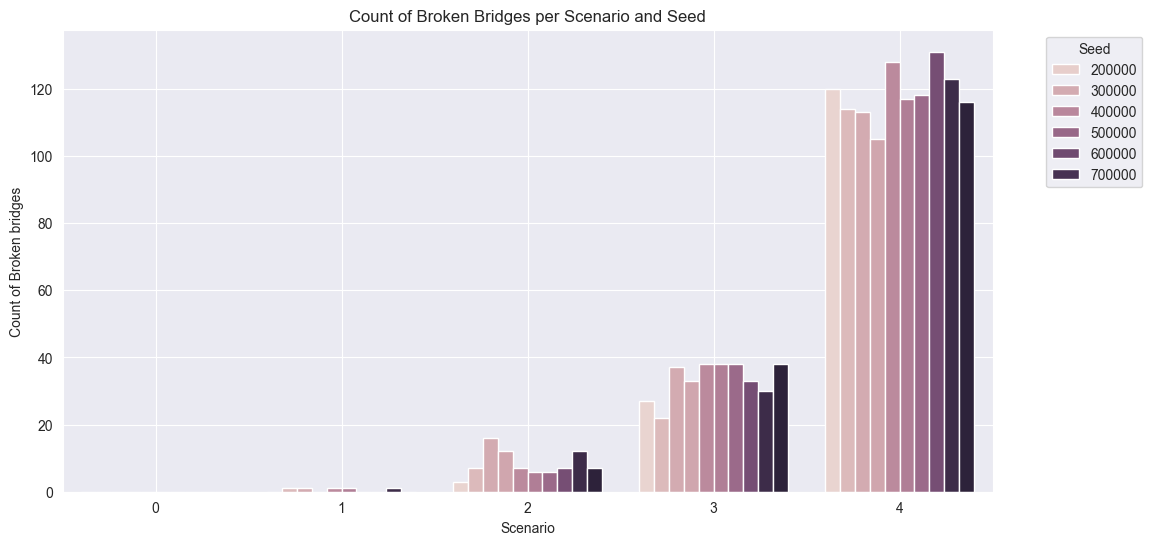

In [37]:
# Calculate the number of broken bridges per scenario and seed
bridge_counts = merged_df.groupby(['Scenario', 'Seed'])['Broken_bridges'].count().reset_index(name='count')

# Plot the count of bridges per scenario and seed
plt.figure(figsize=(12, 6))
sns.barplot(x='Scenario', y='count', hue='Seed', data=bridge_counts, dodge=True)
plt.title('Count of Broken Bridges per Scenario and Seed')
plt.xlabel('Scenario')
plt.ylabel('Count of Broken bridges')
plt.legend(title='Seed', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Save the plot as an image file
plt.savefig('Count of Broken Bridges per Scenario and Seed.png', dpi=300)
plt.show()

In [38]:
# Find the most common bridge that broke down in the most scenarios
bridge_scenario_counts = merged_df.groupby('Broken_bridges')['Scenario'].nunique().reset_index(name='scenario_count')
most_common_bridge = bridge_scenario_counts.loc[bridge_scenario_counts['scenario_count'].idxmax()]

# Display the most common bridge
print(f"The most common bridge that broke down in the most scenarios is: {most_common_bridge['Broken_bridges']} with {most_common_bridge['scenario_count']} scenarios.")


The most common bridge that broke down in the most scenarios is:  N102_12 with 3 scenarios.


In [39]:
# Find the 5 most common bridges per scenario and the amount of times they appear
top_5_bridges_per_scenario = merged_df.groupby('Scenario')['Broken_bridges'].value_counts().groupby(level=0).head(5).reset_index(name='count')

# Display the result
top_5_bridges_per_scenario

,Scenario,Broken_bridges,count
0,1,N102_148,1
1,1,N1_930,1
2,1,N204_38,1
3,1,"N207_66, N1_1049",1
4,1,"N102_148, N1_1049",1
5,2,N104_77,3
6,2,N207_6,2
7,2,N2_541,2
8,2,N1_924,2
9,2,N1_161,2


In [40]:


# Group by 'Scenario' and calculate the mean of 'Average_driving_time'
average_driving_time_per_scenario = merged_df.groupby('Scenario')['Average_driving_time'].mean().reset_index()

# Convert the average driving time from minutes to hours
average_driving_time_per_scenario['Average_driving_time'] = average_driving_time_per_scenario['Average_driving_time'] / 60

# Calculate the number of broken bridges per scenario
number_of_broken_bridges_per_scenario = merged_df.groupby('Scenario')['Broken_bridges'].count().reset_index(name='Number_of_Broken_Bridges')

# Merge the two dataframes
result_df = pd.merge(average_driving_time_per_scenario, number_of_broken_bridges_per_scenario, on='Scenario')

# Display the result
print("Average Driving Time and Number of Broken Bridges per Scenario:")
result_df

Average Driving Time and Number of Broken Bridges per Scenario:


,Scenario,Average_driving_time,Number_of_Broken_Bridges
0,0,4.385804,0
1,1,4.589199,5
2,2,7.081445,83
3,3,14.050616,334
4,4,30.800993,1185


Mean Number of Broken Bridges per Scenario:
   Scenario  Mean_Number_of_Broken_Bridges
0         0                            0.0
1         1                            0.5
2         2                            8.3
3         3                           33.4
4         4                          118.5


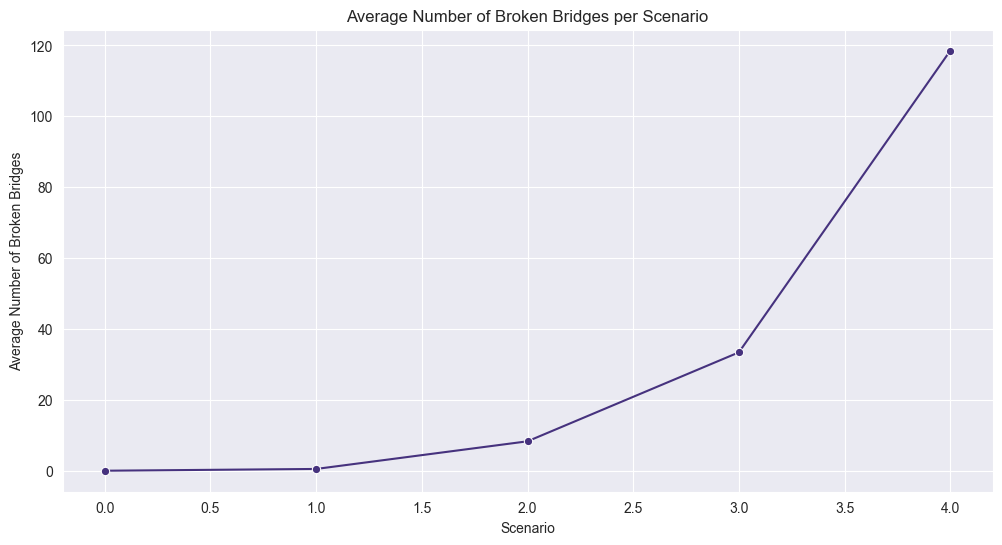

In [41]:
# Calculate the number of broken bridges per scenario and seed
bridge_counts = merged_df.groupby(['Scenario', 'Seed'])['Broken_bridges'].count().reset_index(name='Number_of_Broken_Bridges')

# Calculate the mean number of broken bridges per scenario
mean_broken_bridges_per_scenario = bridge_counts.groupby('Scenario')['Number_of_Broken_Bridges'].mean().reset_index(name='Mean_Number_of_Broken_Bridges')

# Display the mean number of broken bridges per scenario
print("Mean Number of Broken Bridges per Scenario:")
print(mean_broken_bridges_per_scenario)

# Set a custom color palette
sns.set_palette("viridis")

# Plot the mean number of broken bridges per scenario using a line plot with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Scenario', y='Mean_Number_of_Broken_Bridges', data=mean_broken_bridges_per_scenario, marker='o')
plt.title('Average Number of Broken Bridges per Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average Number of Broken Bridges')
plt.grid(True)

# Save the plot as an image file
plt.savefig('average_broken_bridges_per_scenario.png', dpi=300)

# Show the plot
plt.show()

In [42]:
mean_broken_bridges_per_scenario

,Scenario,Mean_Number_of_Broken_Bridges
0,0,0.0
1,1,0.5
2,2,8.3
3,3,33.4
4,4,118.5


Table with the Count of Bridges per Seed per Scenario:
    Scenario    Seed  Number_of_Broken_Bridges
0          0  183003                         0
1          0  258445                         0
2          0  303467                         0
3          0  315302                         0
4          0  396067                         0
5          0  433698                         0
6          0  492714                         0
7          0  588953                         0
8          0  728150                         0
9          0  767387                         0
10         1  183003                         0
11         1  258445                         1
12         1  303467                         1
13         1  315302                         0
14         1  396067                         1
15         1  433698                         1
16         1  492714                         0
17         1  588953                         0
18         1  728150                         1
19   

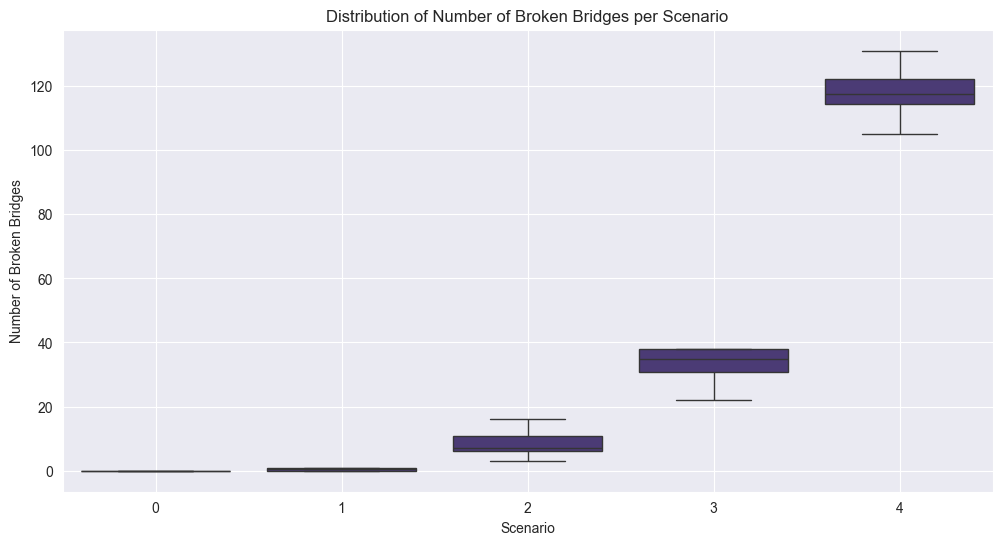

In [43]:
# Calculate the number of broken bridges per scenario and seed
bridge_counts = merged_df.groupby(['Scenario', 'Seed'])['Broken_bridges'].count().reset_index(name='Number_of_Broken_Bridges')

# Display the table
print("Table with the Count of Bridges per Seed per Scenario:")
print(bridge_counts)

# Set a custom color palette
sns.set_palette("viridis")

# Plot the distribution of the number of broken bridges per scenario using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Scenario', y='Number_of_Broken_Bridges', data=bridge_counts)
plt.title('Distribution of Number of Broken Bridges per Scenario')
plt.xlabel('Scenario')
plt.ylabel('Number of Broken Bridges')
plt.grid(True)

# Save the plot as an image file
plt.savefig('distribution_broken_bridges_per_scenario.png', dpi=300)

# Show the plot
plt.show()

In [44]:
type(bridge_counts)

pandas.core.frame.DataFrame

#Calculate a boxplot with the effective speed of the trucks per scenario.

In [45]:
merged_df


,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Categories,Broken_bridges,Average Speed
0,0,433698,263.190177,0,0.000000,NaN,NaN,532.846447
1,0,588953,263.291690,0,0.000000,NaN,NaN,532.603702
2,0,303467,264.804786,0,0.000000,NaN,NaN,532.868769
3,0,183003,263.057074,0,0.000000,NaN,NaN,532.813969
4,0,492714,262.717758,0,0.000000,NaN,NaN,532.841519
...,...,...,...,...,...,...,...,...
1617,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_640,80.369116
1618,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_650,80.369116
1619,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_667,80.369116
1620,4,767387,1793.966639,41959258,2442.900442,"A, C, B, A, B, B, B, A, A, A, A, A, C, A, A, A...",N2_743,80.369116


In [46]:
speeds = merged_df[['Scenario', 'Seed', 'Average Speed']]

print(speeds)

      Scenario    Seed  Average Speed
0            0  433698     532.846447
1            0  588953     532.603702
2            0  303467     532.868769
3            0  183003     532.813969
4            0  492714     532.841519
...        ...     ...            ...
1617         4  767387      80.369116
1618         4  767387      80.369116
1619         4  767387      80.369116
1620         4  767387      80.369116
1621         4  767387      80.369116

[1622 rows x 3 columns]


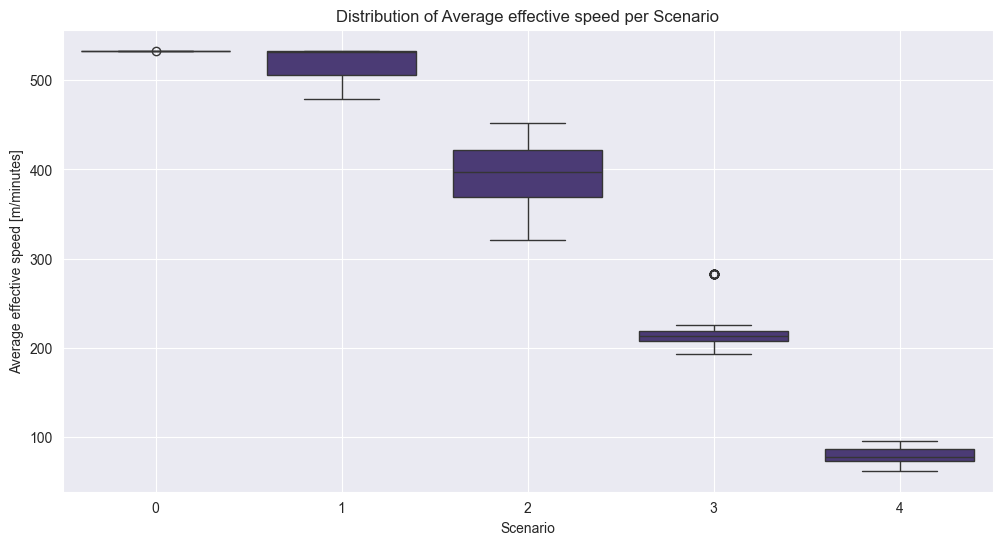

In [47]:



# Set a custom color palette
sns.set_palette("viridis")

# Plot the distribution of the number of broken bridges per scenario using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Scenario', y='Average Speed', data=speeds)
plt.title('Distribution of Average effective speed per Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average effective speed [m/minutes]')
plt.grid(True)

# Save the plot as an image file
plt.savefig('distribution_average_effective_speed_per_scenario.png', dpi=300)

# Show the plot
plt.show()

#Calculate Time travel (driving time) per scenario.

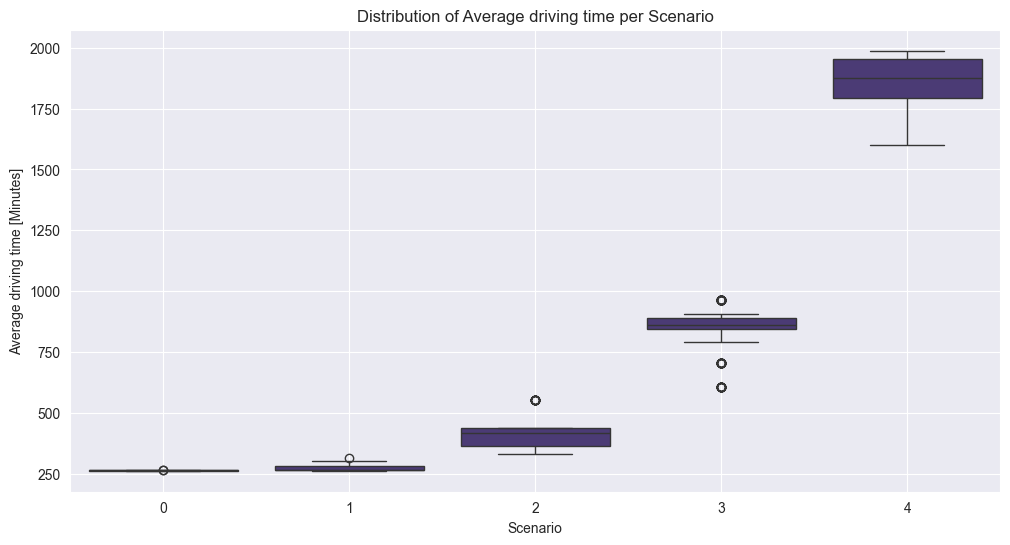

In [48]:
# Set a custom color palette
sns.set_palette("viridis")

# Plot the distribution of the number of broken bridges per scenario using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Scenario', y='Average_driving_time', data=merged_df)
plt.title('Distribution of Average driving time per Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average driving time [Minutes]')
plt.grid(True)

# Save the plot as an image file
plt.savefig('distribution_average_driving_time_per_scenario.png', dpi=300)

# Show the plot
plt.show()